# ライブラリインポートなど

In [1]:
# License: BSD 3-Clause

import openml

都合によりキャッシュディレクトリをカレントディレクトリ配下に変更する。

In [2]:
import os
#openml.config.cache_directory = os.path.expanduser('YOURDIR')
cwd = os.getcwd()
cache_dir = os.path.join(cwd, ".openml/cache")
openml.config.cache_directory = cache_dir

データセットの確認。
リストを得るのだが、戻り値はPandasのDataFrameになっているようだ。

In [3]:
datasets_df = openml.datasets.list_datasets(output_format='dataframe')

In [4]:
datasets_df

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42195,42195,premier_league_matches_2014_2015,1,10283,active,ARFF,NaN,NaN,NaN,NaN,38.0,380.0,9.0,9.0,32.0,0.0
42196,42196,serie_a_matches_2015_2016,1,10283,active,ARFF,NaN,NaN,NaN,NaN,38.0,379.0,44.0,44.0,34.0,0.0
42197,42197,Premier_League_matches,1,10283,active,ARFF,NaN,NaN,NaN,NaN,17.0,2961.0,0.0,0.0,16.0,0.0
42198,42198,Premier_League_odds_and_prob,1,10283,active,ARFF,NaN,NaN,NaN,NaN,11.0,323.0,0.0,0.0,11.0,0.0


著名なIrisデータセットをダウンロードする。
ダウンロード後に、いくつか説明や特徴を確認する。

In [5]:
dataset = openml.datasets.get_dataset(61)

In [6]:
print(f"This is dataset '{dataset.name}', the target feature is "
      f"'{dataset.default_target_attribute}'")

This is dataset 'iris', the target feature is 'class'


In [7]:
print(f"URL: {dataset.url}")

URL: https://www.openml.org/data/v1/download/61/iris.arff


In [8]:
print(dataset.description[:500])

**Author**: R.A. Fisher  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall  
**Please cite**:   

**Iris Plants Database**  
This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class 


In [9]:
dataset.features

{0: [0 - sepallength (numeric)],
 1: [1 - sepalwidth (numeric)],
 2: [2 - petallength (numeric)],
 3: [3 - petalwidth (numeric)],
 4: [4 - class (nominal)]}

データセットのロード

戻り値は以下の通り。
* X - An array/dataframe where each row represents one example with the corresponding feature values.
  * 各行が一つの例を表す。各例は特徴量のベクトルからなる。
* y - the classes for each example
  * 各例のクラス
* categorical_indicator - an array that indicates which feature is categorical
  * カテゴリ値である列を示す配列
* attribute_names - the names of the features for the examples (X) and target feature (y)
  * 特徴の名前

In [10]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

Seabornを使って可視化

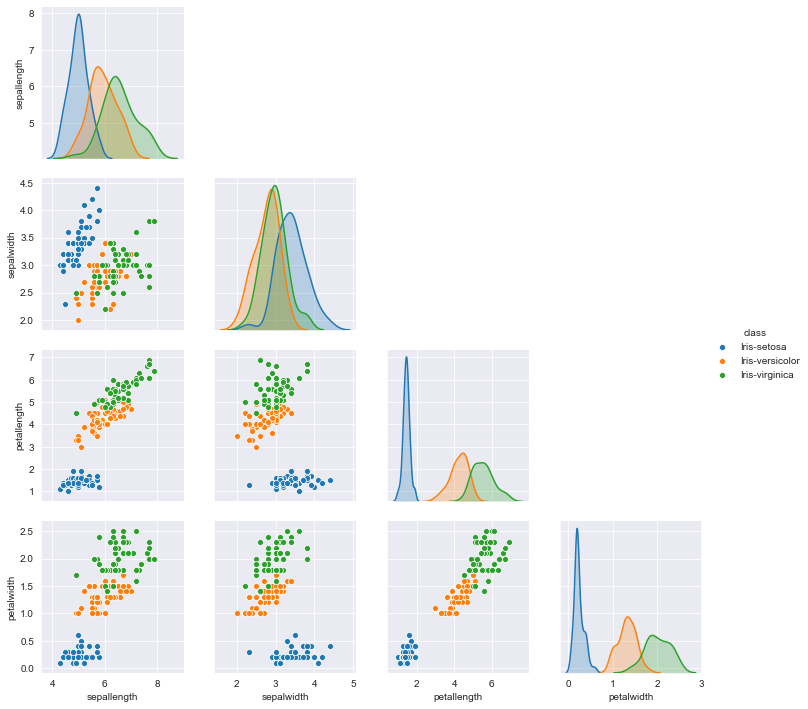

In [12]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)


# We combine all the data so that we can map the different
# examples to different colors according to the classes.
combined_data = pd.concat([X, y], axis=1)
iris_plot = sns.pairplot(combined_data, hue="class")
iris_plot.map_upper(hide_current_axis)
plt.show()